In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

- typeofaction: This column likely represents the nature of the financial transaction. Possible values could include "transfer", "withdrawal", "deposit", etc.

- sourceid: This column indicates the identifier for the source account involved in the transaction. It could be a unique ID for the account from which the money is being transferred or withdrawn.

- destinationid: This column indicates the identifier for the destination account involved in the transaction. It could be a unique ID for the account to which the money is being transferred or deposited.

- amountofmoney: This column records the amount of money involved in the transaction. The values are typically numeric and represent the currency amount of the transaction.

- date: This column contains the date when the transaction occurred. The values are usually in a date format (e.g., YYYY-MM-DD) or a timestamp.

- isfraud: This column is a flag indicating whether the transaction is fraudulent. It is typically a binary value, with possible values such as 0 (not fraudulent) and 1 (fraudulent).

- typeoffraud: If the transaction is marked as fraudulent, this column specifies the type of fraud that was committed. Possible values could include "identity theft", "account takeover", "phishing", etc. If the transaction is not fraudulent, this field may be null or empty.

- These columns together help in tracking and analyzing financial transactions, detecting fraudulent activities, and understanding the nature and flow of funds between accounts.

In [2]:
df1 = pd.read_csv('ML.csv')
df2 = pd.read_csv('MLtag.csv')

In [3]:

merged_df = pd.merge(df1, df2, how='inner', left_on='sourceid', right_on='guiltyid')


In [4]:
merged_df.head(5)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,guiltyid,levelofcrime,typeofcrime
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,30105,head,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,30105,head,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,30105,head,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,30105,head,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,30105,head,type1


In [5]:
merged_df.shape

(1507, 10)

In [6]:
merged_df.isna().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
guiltyid         0
levelofcrime     0
typeofcrime      0
dtype: int64

In [36]:
df1.shape

(2340, 7)

In [41]:
merged_df.shape

(1484, 3)

In [39]:
merged_df.shape

(1507, 10)

In [43]:
merged_df.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud', 'guiltyid', 'levelofcrime', 'typeofcrime'],
      dtype='object')

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [8]:
merged_df.describe()

,sourceid,destinationid,amountofmoney,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,0.597863
std,29614.440603,28988.847246,2.560434e+06,0.490434
min,61.000000,53.000000,1.333200e+04,0.000000
25%,24033.000000,28046.000000,3.359140e+05,0.000000
50%,46632.500000,52748.500000,1.162354e+06,1.000000
75%,75107.000000,78030.000000,4.686559e+06,1.000000
max,100000.000000,99950.000000,7.952497e+06,1.000000


In [10]:
merged_df.describe(include='object')

,typeofaction,date,typeoffraud
count,2340,2340,2340
unique,2,2309,4
top,transfer,2019-05-12 14:02:00,none
freq,1580,2,941


In [9]:
merged_df.isna().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

## handling MetaData

In [5]:
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

In [6]:
merged_df.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud', 'guiltyid', 'levelofcrime', 'typeofcrime'],
      dtype='object')

In [7]:


merged_df['date_Year'] = merged_df['date'].dt.year

 
merged_df['date_Month'] = merged_df['date'].dt.month_name()

merged_df['date_ Day Name'] = merged_df['date'].dt.day_name()

merged_df['Week_Date of Date'] = merged_df['date'].dt.weekday

In [12]:
merged_df.head(5)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,guiltyid,levelofcrime,typeofcrime,date_Year,date_Month,date_ Day Name,Week_Date of Date
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,30105,head,type1,2019,July,Friday,4
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,30105,head,type1,2019,May,Friday,4
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,30105,head,type1,2019,July,Saturday,5
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,30105,head,type1,2019,July,Wednesday,2
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,30105,head,type1,2019,May,Sunday,6


In [60]:
for col in merged_df.select_dtypes(include=['O', 'category']).columns:
    print("="*40)
    print(col)
    print(merged_df[col].value_counts())
    print("="*40)

typeofaction
transfer    1059
cash-in      448
Name: typeofaction, dtype: int64
typeoffraud
type3    518
type2    469
type1    423
none      97
Name: typeoffraud, dtype: int64
levelofcrime
colleague    977
head         530
Name: levelofcrime, dtype: int64
typeofcrime
type3      536
type1      457
type2      427
type2-2     45
type2-1     42
Name: typeofcrime, dtype: int64
date_Month
May         326
April       320
March       293
June        283
July        210
February     75
Name: date_Month, dtype: int64
date_ Day Name
Monday       232
Friday       224
Thursday     217
Saturday     215
Tuesday      214
Wednesday    204
Sunday       201
Name: date_ Day Name, dtype: int64


## EDA

In [ ]:
float_merged_df=merged_df.select_dtypes(include=['float64','int64']).columns
for col in float_merged_df:
    fig = px.box(float_merged_df, y=merged_df[col])
    fig.update_layout(yaxis_title=col)
    fig.show()

In [13]:
merged_df.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud', 'guiltyid', 'levelofcrime', 'typeofcrime',
       'date_Year', 'date_Month', 'date_ Day Name', 'Week_Date of Date'],
      dtype='object')

In [12]:
line_chart_months = px.line(merged_df.groupby(merged_df['date_Month']).size(), title='Number of Courses Published per months ')
line_chart_months.update_xaxes(title_text='date_Month')
line_chart_months.update_yaxes(title_text='amountofmoney')
line_chart_months.show()

In [9]:
merged_df.groupby(['date_Month'])[['amountofmoney']].mean().sort_values(by='amountofmoney', ascending=False)

,amountofmoney
date_Month,
May,2.637753e+06
July,2.634062e+06
June,2.629663e+06
April,2.523826e+06
February,2.297420e+06
March,2.168252e+06


In [11]:
merged_df.groupby(['date_Month','typeofaction'])[['amountofmoney']].mean().sort_values(by='amountofmoney', ascending=False)

,,amountofmoney
date_Month,typeofaction,
July,transfer,3.604064e+06
June,transfer,3.445474e+06
February,transfer,3.427513e+06
May,transfer,3.322449e+06
April,transfer,3.281258e+06
March,transfer,2.896854e+06
July,cash-in,7.350430e+05
April,cash-in,7.299081e+05
May,cash-in,6.651773e+05


In [38]:
merged_df.groupby(['sourceid'])[['amountofmoney']].sum().sort_values(by='amountofmoney', ascending=False).head(5)

,amountofmoney
sourceid,
57384,27010796
7654,26371110
36647,23047890
55033,22055358
66955,21021438


In [64]:
merged_df.groupby(['sourceid','typeofaction'])[['typeofaction']].max()

,,typeofaction
sourceid,typeofaction,
185,transfer,transfer
195,transfer,transfer
226,transfer,transfer
239,transfer,transfer
246,transfer,transfer
...,...,...
99359,transfer,transfer
99444,transfer,transfer
99667,transfer,transfer


In [45]:
dfs=merged_df[merged_df['sourceid']==57384]
dfs

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,guiltyid,levelofcrime,typeofcrime,date_Year,date_Month,date_ Day Name,Week_Date of Date
691,transfer,57384,42460,6654803,2019-04-04 12:30:00,1,type2,57384,colleague,type2,2019,April,Thursday,3
692,transfer,57384,42460,6654803,2019-04-04 12:30:00,1,type2,57384,colleague,type2,2019,April,Thursday,3
693,transfer,57384,90524,6850595,2019-06-02 09:04:00,1,type2,57384,colleague,type2,2019,June,Sunday,6
694,transfer,57384,90524,6850595,2019-06-02 09:04:00,1,type2,57384,colleague,type2,2019,June,Sunday,6


In [41]:
max_reviews_by_subject = mm.groupby(['date_Month','sourceid'])[['amountofmoney']].sum().reset_index()
max_reviews_by_subject_chart = px.bar(max_reviews_by_subject, x='date_Month', y='amountofmoney', color='sourceid',
                                      title='Max  amount of money by date_Month')
max_reviews_by_subject_chart.update_xaxes(title_text='date_Month')
max_reviews_by_subject_chart.update_yaxes(title_text='Max amount of money')
max_reviews_by_subject_chart.show()

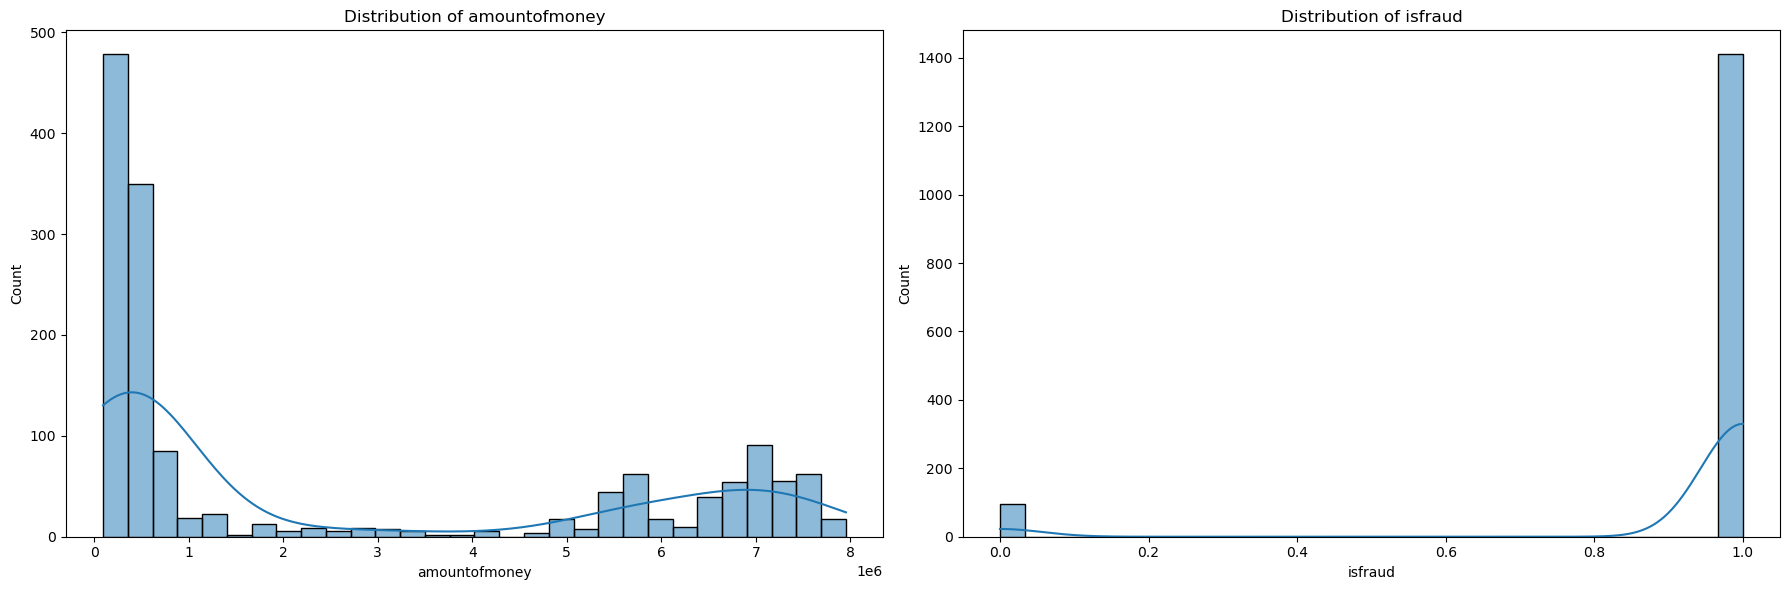

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes = axes.flatten()

sns.histplot(merged_df['amountofmoney'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of amountofmoney')


sns.histplot(merged_df['isfraud'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of isfraud')



plt.tight_layout()
plt.show()

In [27]:

fraud_proportion = merged_df['isfraud'].value_counts(normalize=True).reset_index()
fraud_proportion.columns = ['isfraud', 'proportion']

fraud_proportion['isfraud'] = fraud_proportion['isfraud'].map({0: 'Not Fraud', 1: 'Fraud'})


fig = px.bar(fraud_proportion, x='isfraud', y='proportion', color='isfraud',
             color_discrete_map={'Not Fraud': 'green', 'Fraud': 'red'},
             title='Proportion of Fraudulent Transactions',
             labels={'isfraud': 'Is Fraud', 'proportion': 'Proportion'})


fig.update_layout(xaxis_title='Is Fraud', yaxis_title='Proportion',
                  xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Not Fraud', 'Fraud']),
                  yaxis_tickformat='.1%')


fig.show()

In [76]:

fraud_proportion = merged_df['typeofaction'].value_counts(normalize=True).reset_index()
fraud_proportion.columns = ['typeofaction', 'proportion']




fig = px.bar(fraud_proportion, x='typeofaction', y='proportion', color='typeofaction',
            
             title='Proportion of  Transactions',
             )


fig.update_layout(xaxis_title='typeofaction', yaxis_title='Proportion',
                  )


fig.show()

In [26]:
import plotly.express as px

counts = merged_df.groupby(['typeofaction']).size().reset_index(name='Count')

fig = px.sunburst(counts, path=['typeofaction'], values="Count")

fig.show()

In [102]:
Number_of_fraud_and_typeofaction = px.bar(merged_df.groupby([merged_df['typeofaction'], 'isfraud']).size().reset_index(name='count'), 
                                      x='typeofaction', y='count', color='isfraud', 
                                      title='Number of fraud and typeofaction')
Number_of_fraud_and_typeofaction.update_xaxes(title_text='fraud')
Number_of_fraud_and_typeofaction.update_yaxes(title_text='Number of fraud')
Number_of_fraud_and_typeofaction.update_traces(text=merged_df.groupby([merged_df['typeofaction'], 'isfraud']).size().reset_index(name='count')['count'], textposition='outside', 
                                           )
Number_of_fraud_and_typeofaction.show()

In [100]:
Number_of_fraud_and_levelofcrime = px.bar(merged_df.groupby([merged_df['levelofcrime'], 'isfraud']).size().reset_index(name='count'), 
                                      x='levelofcrime', y='count', color='isfraud', 
                                      title='Number of fraud and levelofcrime')
Number_of_fraud_and_levelofcrime.update_xaxes(title_text='levelofcrime')
Number_of_fraud_and_levelofcrime.update_yaxes(title_text='Number of fraud')
.update_traces(text=merged_df.groupby([merged_df['levelofcrime'], 'isfraud']).size().reset_index(name='count')['count'], textposition='outside', 
                                           )
Number_of_fraud_and_levelofcrime.show()

In [105]:
merged_df.groupby(['isfraud','typeofaction'])[['typeofaction']].count()

typeofaction
isfraud typeofaction              
0       cash-in                 25
        transfer                72
1       cash-in                423
        transfer               987

In [121]:
merged_df.groupby(['isfraud','levelofcrime'])[['levelofcrime']].count()

levelofcrime
isfraud levelofcrime              
0       colleague               54
        head                    43
1       colleague              923
        head                   487

In [73]:
mm=merged_df.groupby(['sourceid'])[['typeofaction']].size()

mm.nlargest(10)

sourceid
4161     30
39284    29
82688    26
37177    25
92735    25
13919    24
69208    24
24041    23
30965    22
72032    21
dtype: int64

In [127]:
merged_df.groupby(['typeofaction'])[['amountofmoney']].max()

,amountofmoney
typeofaction,
cash-in,6875557
transfer,7952497


In [54]:
merged_df.groupby(['typeofcrime','typeoffraud'])[['typeoffraud']].count()

typeoffraud
typeofcrime typeoffraud             
type1       none                  27
            type1                423
            type2                  2
            type3                  5
type2       none                  24
            type2                403
type2-1     none                  10
            type2                 32
type2-2     none                  13
            type2                 32
type3       none                  23
            type3                513

In [57]:
merged_df.groupby(['sourceid'])[['sourceid','typeofaction']].max()

,sourceid,typeofaction
sourceid,,
185,185,transfer
195,195,transfer
226,226,transfer
239,239,transfer
246,246,transfer
...,...,...
99359,99359,transfer
99444,99444,transfer
99667,99667,transfer


In [80]:
merged_df.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud', 'guiltyid', 'levelofcrime', 'typeofcrime',
       ' date_Year', 'date_Month', 'date_ Day Name', 'Day_Date of  Date',
       'Week_Date of Date', 'date_Year'],
      dtype='object')

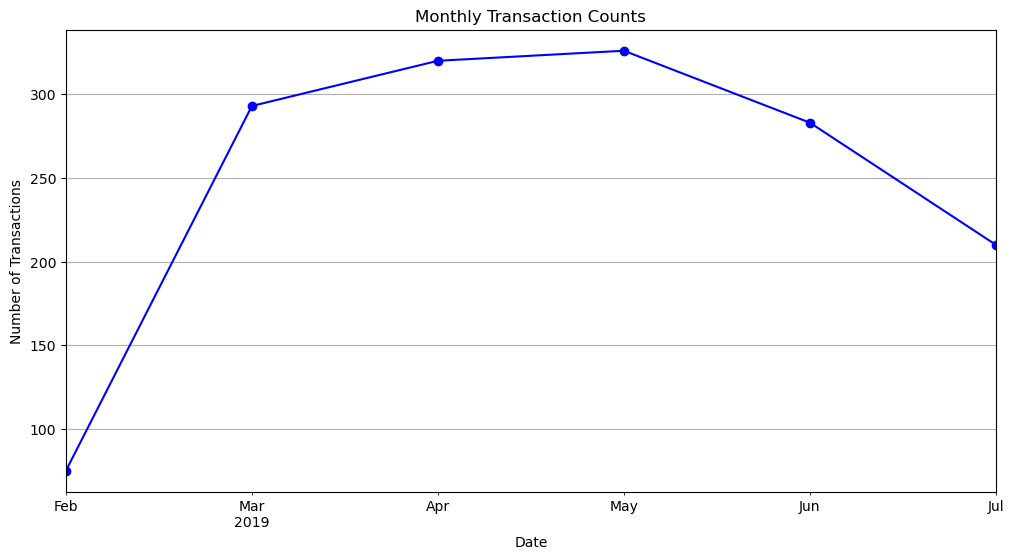

In [25]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
time_series = merged_df.set_index('date').resample('M').size()

plt.figure(figsize=(12, 6))
time_series.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_57940\2404303716.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

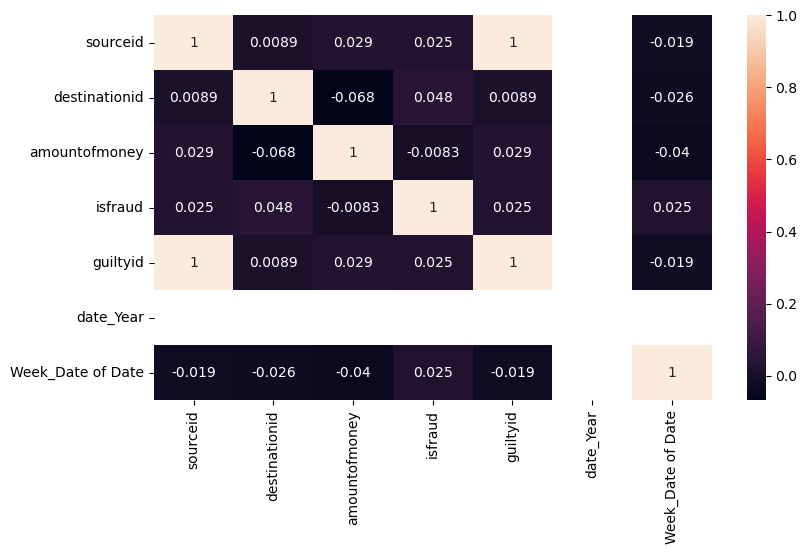

In [15]:
plt.figure(figsize=(9,5))
sns.heatmap(merged_df.corr(),annot=True)

- Fraudulent Transactions (isfraud = 1): 93.6%
- Non-Fraudulent Transactions (isfraud = 0): 6.4%